<a href="https://colab.research.google.com/github/xuandy05/Python-A.I./blob/master/ASL_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir .kaggle
!mkdir ~/.kaggle

mkdir: cannot create directory ‘.kaggle’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
import os
import json


token = {"username":"bdonluong","key":"44600f6f95296c477b56c17f51c39d6f"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
    
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json



- path is now set to: {/content}


In [0]:
!kaggle datasets download -d ardamavi/sign-language-digits-dataset -p /content/datasets/kaggle-hs
%cd datasets/kaggle-hs/

 63% 5.00M/7.94M [00:00<00:00, 41.4MB/s]
100% 7.94M/7.94M [00:00<00:00, 50.4MB/s]
/content/datasets/kaggle-hs


In [0]:
!unzip \*zip
!unzip \*zip

Archive:  sign-language-digits-dataset.zip
  inflating: Sign-language-digits-dataset.zip  
Archive:  sign-language-digits-dataset.zip
replace Sign-language-digits-dataset.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Sign-language-digits-dataset.zip  

Archive:  Sign-language-digits-dataset.zip
  inflating: X.npy                   
  inflating: Y.npy                   

2 archives were successfully processed.


In [0]:
dsroot = os.getcwd()
os.listdir(dsroot)

['sign-language-digits-dataset.zip',
 'Y.npy',
 'Sign-language-digits-dataset.zip',
 'X.npy']

In [0]:
# load data set
import numpy as np

x_l = np.load('X.npy')
y_l = np.load('Y.npy')
y_l = np.argmax(y_l,axis = 1)

0

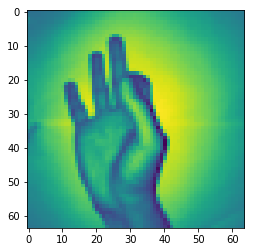

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_l[0])
y_l[0]

In [0]:
x_l = x_l.reshape(x_l.shape[0],64,64,1)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_l, y_l, test_size = 0.2)

In [0]:
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(x = x_train, y = keras.utils.to_categorical(y_train, num_classes = 10), batch_size = 16, epochs = 20, validation_split = 0.2)

Train on 1319 samples, validate on 330 samples
Epoch 1/20
1319/1319 [==============================] - 8s 6ms/step - loss: 2.3001 - acc: 0.1304 - val_loss: 2.2668 - val_acc: 0.1061
Epoch 2/20
1319/1319 [==============================] - 7s 6ms/step - loss: 1.4011 - acc: 0.5580 - val_loss: 0.9995 - val_acc: 0.6788
Epoch 3/20
1319/1319 [==============================] - 7s 5ms/step - loss: 0.6234 - acc: 0.7991 - val_loss: 0.6366 - val_acc: 0.7758
Epoch 4/20
1319/1319 [==============================] - 7s 5ms/step - loss: 0.4385 - acc: 0.8605 - val_loss: 0.5213 - val_acc: 0.8424
Epoch 5/20
1319/1319 [==============================] - 7s 5ms/step - loss: 0.3410 - acc: 0.8908 - val_loss: 0.4469 - val_acc: 0.8636
Epoch 6/20
1319/1319 [==============================] - 7s 5ms/step - loss: 0.2680 - acc: 0.9204 - val_loss: 0.4073 - val_acc: 0.8788
Epoch 7/20
1319/1319 [==============================] - 7s 5ms/step - loss: 0.1874 - acc: 0.9477 - val_loss: 0.5111 - val_acc: 0.8636
Epoch 8/20
1319

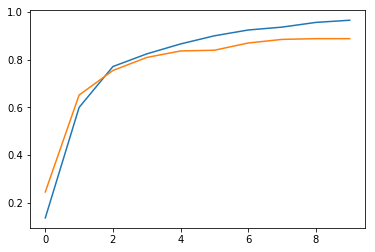

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [0]:
import numpy as np
y_pred = model.predict(x_test)
counter = 0
total = 0
y_pred2 = []
for each in y_pred:
  y_pred2.append(np.argmax(each))
for i in range(len(y_pred2)):
  total += 1
  if y_pred2[i] == y_test[i]:
    counter += 1
print("The accuracy is", counter / total)

The accuracy is 0.8692493946731235
